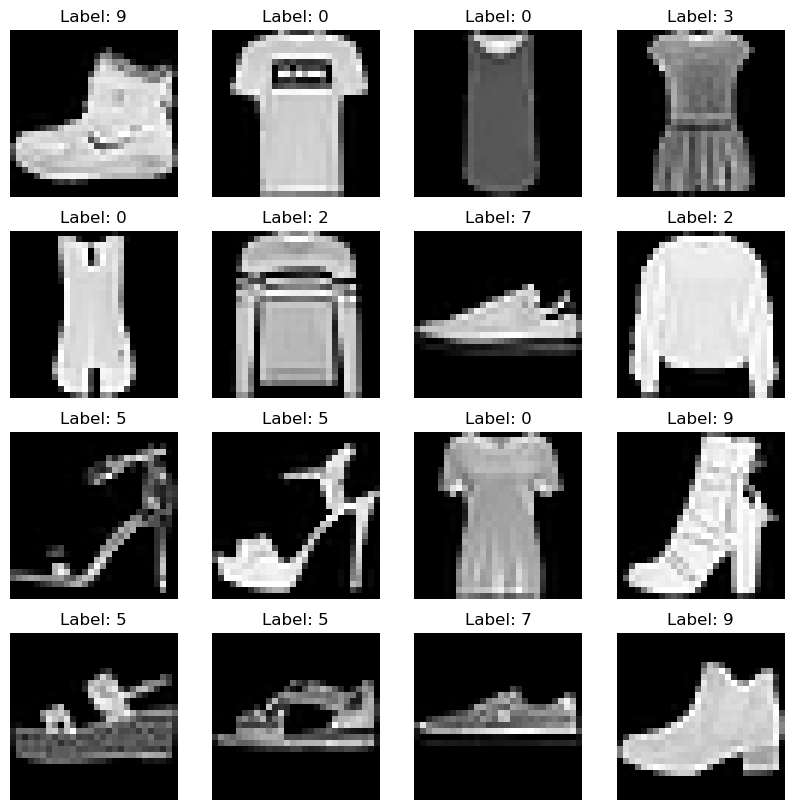

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.6929 - loss: 0.8979
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - accuracy: 0.8609 - loss: 0.3905
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.8800 - loss: 0.3320
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.8909 - loss: 0.3031
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.9001 - loss: 0.2821
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.9072 - loss: 0.2600
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 13s 44ms/step - accuracy: 0.9130 - loss: 0.2447
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.9150 - loss: 0.2315
Epoch 9/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.9203 - loss: 0.2172
Epoch 10/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.9261 - loss: 0.2027
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Confusion matrix: [[910   0  22   9   6   1  45   0   7   0]
 [  4 973   0  16

In [1]:
import tensorflow.keras.datasets.fashion_mnist as fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix

# Import and preprocess data
(featuresTrain, labelTrain), (featuresTest, labelTest) = fashion_mnist.load_data()

# Vizualizacija na slikite
plt.figure(figsize=(10, 10))
for i in range(16):  # Display the first 16 images
    plt.subplot(4, 4, i + 1)  # Create a 4x4 grid
    plt.imshow(featuresTrain[i], cmap='gray')  # Display the image in grayscale
    plt.title(f'Label: {labelTrain[i]}')  # Show the label as title
    plt.axis('off')  # Hide axis for cleaner look
plt.show()

featuresTrain, featuresTest = featuresTrain / 255.0, featuresTest / 255.0  # normalization in range 0-1

# # Reshape images to 4D tensors (batch_size, height, width, channels)
featuresTrain = featuresTrain.reshape(-1, 28, 28, 1)
featuresTest = featuresTest.reshape(-1, 28, 28, 1)


# One-hot encode labels
labelTrainVector = tf.keras.utils.to_categorical(labelTrain, 10)
labelTestVector = tf.keras.utils.to_categorical(labelTest, 10)

# Define the CNN model with an explicit Input layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)), # each input will be a 28x28 grayscale image with a single color channel
    
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'), 
    # convolutional layer with 32 filters, each of size 3x3,
    # it will scan the input image to learn 32 different features like edges or textures.
    # ReLU activation function, setting all negative values to zero, 
    # which introduces non-linearity to the model and helps it learn complex patterns.
    
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    #  Reduces the spatial dimensions of the feature maps by taking the maximum value in each 2x2 region.
    # this helps to down-sample the data, reduce computational load, and make the learned features more robust.
    
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    # adds another convolutional layer, this time with 64 filters.
    # the model can now learn more complex and abstract features from the data.
    # ReLU Activation: Again applies ReLU to introduce non-linearity.
    
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # another pooling layer to further down-sample the feature maps.
    
    tf.keras.layers.Flatten(),
    #  Converts the 2D feature maps from the previous layer into a 1D vector
    #  this is necessary before feeding the data into the dense (fully connected) layers.
    
    tf.keras.layers.Dense(100, activation='relu'),
    # Dense Layer: A fully connected layer with 100 neurons
    # this layer learns to combine the features extracted by the convolutional layers to make predictions.
    # ReLU Activation: Applies ReLU for non-linearity.
    
    tf.keras.layers.Dense(10, activation='softmax')
    #  The output layer has 10 neurons, corresponding to the 10 classes in the dataset (e.g., classes for fashion-MNIST).
    #  Softmax Activation: Converts the output into a probability distribution across the 10 classes,
    # allowing the model to make a prediction by selecting the class with the highest probability.
    
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Adam (Adaptive Moment Estimation): Adam is a popular optimizer for deep learning that combines the benefits of both
# the Momentum and RMSprop optimizers.
# It adapts the learning rate during training for each parameter, making it more efficient and often faster to converge
# than standard optimizers like SGD (Stochastic Gradient Descent).
# Default Learning Rate: Adam has a default learning rate that adjusts based on the gradients.
# This default often works well for many tasks, though it can be tuned if necessary.

# Train the model
model.fit(featuresTrain, labelTrainVector, epochs=10, batch_size=200) # number of samples per epoch

# Predict on test set
labelPredicted = model.predict(featuresTest)
labelPredicted = np.argmax(labelPredicted, axis=1)

# Evaluate the model
print('Confusion matrix:', confusion_matrix(labelTest, labelPredicted))
print('\n\n')
print('Accuracy score:', accuracy_score(labelTest, labelPredicted))
from PIL import Image
import numpy as np

# Function to preprocess and predict on an uploaded image
def predict_image(model, image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    
    # Resize to 28x28 pixels (same as Fashion MNIST)
    img = img.resize((28, 28))
    
    # Convert to numpy array and normalize (as we did with training images)
    img_array = np.array(img) / 255.0
    
    # Reshape to (1, 28, 28, 1) to match model's input shape
    img_array = img_array.reshape(1, 28, 28, 1)
    
    prediction = model.predict(img_array)
    
    predicted_class = np.argmax(prediction, axis=1)[0]

    fashion=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
    
    predicted_class_word = fashion[predicted_class]
   
    print(f"Predicted class: {predicted_class_word}")

predict_image(model, 'shirt.png')